## Övning 5.3

Uppgiften lyder
<img src="img/exe5.3.png">

In [1]:
import pandas as pd
import numpy as np

stickprov = [[0,5,10,15,20,25,30],[0.003,0.127,0.251,0.390,0.498,0.625,0.763]]
data = pd.DataFrame(np.transpose(stickprov),columns=["Silver","Absorbance"])
data

,Silver,Absorbance
0,0.0,0.003
1,5.0,0.127
2,10.0,0.251
3,15.0,0.390
4,20.0,0.498
5,25.0,0.625
6,30.0,0.763


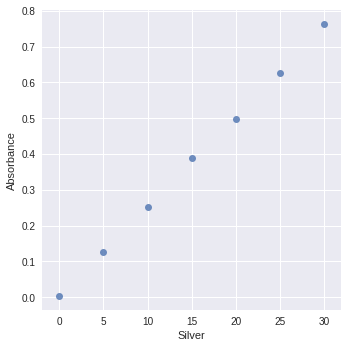

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()
g = sns.lmplot(data=data,x="Silver",y="Absorbance",fit_reg=False)


Vi gör elementvis summering, för att bestämma regressions koefficienter enl ekvation 5.4.1 och 5.4.2.

In [22]:
antal, sum_x, sum_y = 0,.0,.0
for row in data.itertuples():
    sum_x += row[1]
    sum_y += row[2]
    antal += 1
mean_x,mean_y = sum_x/antal, sum_y/antal
sum_xy, sum_xx = .0,.0
for row in data.itertuples():
    sum_xy += (row[1]-mean_x)*(row[2]-mean_y)
    sum_xx += (row[1]-mean_x)**2

b = sum_xy/sum_xx
a = mean_y-b*mean_x

print "Regressions linje given av y= %.3f * x + %.3f" % (b,a)


Regressions linje given av y= 0.025 * x + 0.002


Vi använder sedan ekvation 5.5.1, 5.5.2 och 5.5.3 för att räkna ut standardfel och 95% konfidens intevall för regressions koefficienterna 

In [23]:
sum_yyhat,sum_xx_bare = 0.,0.
for row in data.itertuples():
    sum_yyhat += (row[2]-(row[1]*b+a))**2
    sum_xx_bare += (row[1])**2

s_yx = np.sqrt(sum_yyhat/(antal-2))
sb = s_yx/np.sqrt(sum_xx)
sa = s_yx*np.sqrt(sum_xx_bare/(antal*sum_xx))

from scipy.stats import t
t_kritisk = t.ppf(1-0.05/2,antal-2)

print "a = %.4f+-%.4f, b = %.4f+-%.4f" % (a,sa*t_kritisk,b,sb*t_kritisk)

a = 0.0021+-0.0123, b = 0.0252+-0.0007
